In [1]:
import pandas as pd;
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import numpy as np

In [2]:
detail_df = pd.read_csv('./data/datasets/item/detail_list.csv', sep=',')
detail_df.head()

,id,name,category,brand,price,discount,discount_rate,mota,image_url,n_sold,rank,main_category
0,112329645,1 gói Chân Gà CHEF BIGGY Vị Cay,Bách Hóa Online/Đồ Ăn Vặt/Các Loại Đồ Ăn Vặt Khác,CHEF BIGGY,10000,0,0,* Chân Gà CHEF BIGGY Vị Cay \n- Toàn bộ nguyê...,https://salt.tikicdn.com/cache/280x280/ts/prod...,860.0,1.0,bach-hoa-online
1,2454355,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,Yomost,360000,0,0,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,2788.0,1.0,bach-hoa-online
2,2454359,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,Yomost,360000,0,0,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,1591.0,9.0,bach-hoa-online
3,2454353,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,Yomost,319000,41000,11,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,2186.0,7.0,bach-hoa-online
4,98565212,Thùng 24 Lon Nước Ngọt Có Gaz Pepsi (320ml/lon),Bách Hóa Online/Đồ Uống Không Cồn/Đồ uống có g...,Pepsi,186000,2000,1,\nPepsi là nhãn hiệu nước giải khát hương Cola...,https://salt.tikicdn.com/cache/280x280/media/c...,1511.0,4.0,bach-hoa-online


In [3]:
detail_df.describe()

,id,price,discount,discount_rate,n_sold,rank
count,2.582700e+04,2.582700e+04,2.582700e+04,25827.000000,23974.000000,17435.000000
mean,7.145123e+07,8.124668e+05,1.018318e+05,10.681264,639.902061,27.207284
std,4.111859e+07,3.450116e+06,6.604155e+05,16.678143,7145.079687,25.607362
min,5.466500e+04,1.000000e+03,0.000000e+00,0.000000,1.000000,1.000000
25%,3.932820e+07,7.920500e+04,0.000000e+00,0.000000,13.000000,6.000000
50%,7.383470e+07,1.700000e+05,0.000000e+00,0.000000,60.000000,18.000000
75%,1.072001e+08,3.980000e+05,4.000000e+04,20.000000,273.000000,41.000000
max,1.524759e+08,1.107000e+08,5.096000e+07,91.000000,807078.000000,100.000000


In [4]:
detail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25827 entries, 0 to 25826
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             25827 non-null  int64  
 1   name           25827 non-null  object 
 2   category       25827 non-null  object 
 3   brand          23752 non-null  object 
 4   price          25827 non-null  int64  
 5   discount       25827 non-null  int64  
 6   discount_rate  25827 non-null  int64  
 7   mota           25825 non-null  object 
 8   image_url      25827 non-null  object 
 9   n_sold         23974 non-null  float64
 10  rank           17435 non-null  float64
 11  main_category  25827 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.4+ MB


In [5]:
detail_df['brand'].value_counts()

OEM                9515
Xiaomi              331
Samsung             227
Lock&Lock           187
Gumac               124
                   ... 
NOCTUA                1
Topcash               1
PureAroma             1
EPSON                 1
Nature Republic       1
Name: brand, Length: 2659, dtype: int64

In [6]:
detail_df['brand'] = detail_df['brand'].replace('\tOEM', 'OEM')
detail_df['brand'] = detail_df['brand'].replace(np.nan, 'OTHERS')
detail_df['brand'] = detail_df['brand'].apply(lambda x: x.upper())

In [7]:
detail_df.dtypes

id                 int64
name              object
category          object
brand             object
price              int64
discount           int64
discount_rate      int64
mota              object
image_url         object
n_sold           float64
rank             float64
main_category     object
dtype: object

In [8]:
item_quantity_per_brand = detail_df['brand'].value_counts()
item_quantity_per_brand

OEM            9636
OTHERS         2076
XIAOMI          331
SAMSUNG         227
LOCK&LOCK       187
               ... 
NO.1              1
DIAMOND           1
CANVAS            1
TRAVEL KING       1
VIBOOK            1
Name: brand, Length: 2658, dtype: int64

In [9]:
brand_title = item_quantity_per_brand.index.tolist()
if '-1' in brand_title:
    brand_title[brand_title.index('-1')] = 'OTHERS';
brand_title[:5]

['OEM', 'OTHERS', 'XIAOMI', 'SAMSUNG', 'LOCK&LOCK']

Text(0, 0.5, 'Number of items manufactured per brand')

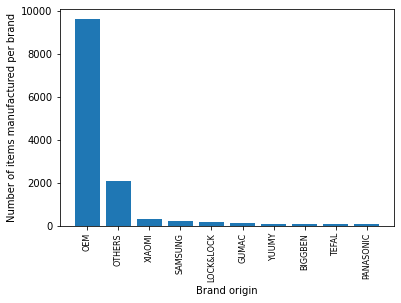

In [10]:
plt.bar(brand_title[:10], item_quantity_per_brand[:10])
plt.xticks(brand_title[:10], rotation=90, size=8)
plt.xlabel('Brand origin')
plt.ylabel('Number of items manufactured per brand')

In [11]:
average_price_and_count_per_brand = detail_df.groupby('brand')['price'].agg(['mean', 'count'])
print(type(average_price_and_count_per_brand))
average_price_and_count_per_brand

<class 'pandas.core.frame.DataFrame'>


,mean,count
brand,,
BRATECK,5.740000e+05,3
EIRMAI,1.079500e+06,2
EZVIZ,8.226492e+05,64
GAOMON,8.675000e+05,4
HARDEN,3.512500e+05,4
...,...,...
ĐỒ CÂU 24H,9.000000e+04,2
ĐỒ DA CAO CẤP NHẤT TÍNH,1.850000e+05,1
ĐỒNG NAI (PINACO),3.960000e+05,1


In [12]:
brand_title = average_price_and_count_per_brand.sort_values(by='mean', ascending=False).index.tolist()
brand_title[:5]

['PIAGGIO', 'HONDA', 'VINFAST', 'YAMAHA', 'APPLE']

In [13]:
average_price_per_brand = average_price_and_count_per_brand.sort_values(by='mean', ascending=False)['mean']
average_price_per_brand

brand
PIAGGIO                         5.850000e+07
HONDA                           4.363810e+07
VINFAST                         2.895000e+07
YAMAHA                          2.802475e+07
APPLE                           2.000979e+07
                                    ...     
MUỐI THÀNH PHÁT                 8.000000e+03
AZDECAL                         7.000000e+03
PTA                             6.666667e+03
MUỐI IOD THÀNH PHÁT             6.000000e+03
XANHXINH.COM GREEN YOUR HOME    1.111000e+03
Name: mean, Length: 2658, dtype: float64

In [14]:
count_per_brand = average_price_and_count_per_brand.sort_values(by='count', ascending=False)['count']
count_per_brand

brand
OEM                9636
OTHERS             2076
XIAOMI              331
SAMSUNG             227
LOCK&LOCK           187
                   ... 
NGP MAX               1
NGON NGON FOOD        1
DSFY                  1
NEXX & DEE            1
ĐỨC                   1
Name: count, Length: 2658, dtype: int64

C:\Users\Pc\AppData\Local\Temp/ipykernel_13156/3146660454.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(x, rotation=90, size=10)


Text(0, 0.5, 'Number of items oer brand')

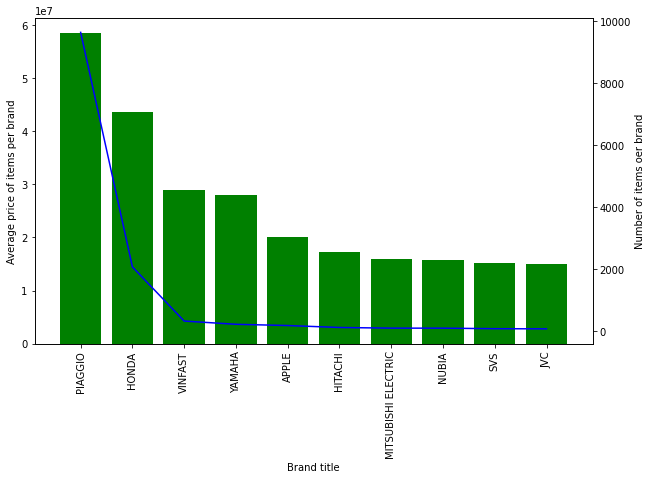

In [15]:
x = brand_title[:10]
y1 = average_price_per_brand[:10]
y2 = count_per_brand[:10]

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 6)
ax2 = ax1.twinx()
ax1.bar(x, y1, color='g')
ax2.plot(x, y2, 'b-')

ax1.set_xticklabels(x, rotation=90, size=10)
ax1.set_xlabel('Brand title')
ax1.set_ylabel('Average price of items per brand')
ax2.set_ylabel('Number of items oer brand')

In [16]:
detail_df.head(3)

,id,name,category,brand,price,discount,discount_rate,mota,image_url,n_sold,rank,main_category
0,112329645,1 gói Chân Gà CHEF BIGGY Vị Cay,Bách Hóa Online/Đồ Ăn Vặt/Các Loại Đồ Ăn Vặt Khác,CHEF BIGGY,10000,0,0,* Chân Gà CHEF BIGGY Vị Cay \n- Toàn bộ nguyê...,https://salt.tikicdn.com/cache/280x280/ts/prod...,860.0,1.0,bach-hoa-online
1,2454355,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,YOMOST,360000,0,0,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,2788.0,1.0,bach-hoa-online
2,2454359,Thùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yomost ...,Bách Hóa Online/Sữa và các Sản phẩm từ sữa/Sữa...,YOMOST,360000,0,0,\n\nThùng 48 Hộp Sữa Chua Lên Men Tự Nhiên Yom...,https://salt.tikicdn.com/cache/280x280/ts/prod...,1591.0,9.0,bach-hoa-online


In [17]:
detail_df['category'].value_counts()

Túi thời trang nam/Túi đeo chéo nam                                                                                                                         527
Túi thời trang nữ/Túi đeo chéo, túi đeo vai nữ/Túi đeo chéo dạo phố                                                                                         457
Balo và Vali/Balo/Balo nữ                                                                                                                                   341
Điện Thoại - Máy Tính Bảng/Điện thoại Smartphone                                                                                                            279
Máy Ảnh - Máy Quay Phim/Camera Giám Sát/Camera IP                                                                                                           271
                                                                                                                                                           ... 
Thiết Bị Số - Phụ Kiện Số/Thiết Bị Thông

In [18]:
ratings = pd.read_csv('./data/datasets/rating/rating_list.csv', sep=',')
ratings.head(5)

,user_id,item_id,rating,timestamp,comment
0,12134826,2454355,1,1638029440,"Tiki bán hàng “treo đầu dê bán thịt chó”, đưa ..."
1,10165696,2454355,5,1629035160,sản phẩm tuyệt với. shipper cũng tuyệt vời. ch...
2,11264068,2454355,2,1589629724,"sáng nay nhận sữa, 2 mẹ con uống 2 hộp, ói mữa..."
3,16720563,2454355,1,1595313777,"tiki làm việc tắc trách, tôi mua sữa yom..."
4,7778369,2454355,4,1627175789,Theo mình thấy dùng sưa hộp 1 lit mình thấy ng...


In [19]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569772 entries, 0 to 569771
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    569772 non-null  int64 
 1   item_id    569772 non-null  int64 
 2   rating     569772 non-null  int64 
 3   timestamp  569772 non-null  int64 
 4   comment    551730 non-null  object
dtypes: int64(4), object(1)
memory usage: 21.7+ MB


In [20]:
ratings.describe()

,user_id,item_id,rating,timestamp
count,5.697720e+05,5.697720e+05,569772.000000,5.697720e+05
mean,1.157773e+07,5.344599e+07,4.195292,1.619067e+09
std,7.477017e+06,3.787429e+07,1.322894,2.302116e+07
min,1.000000e+01,5.589700e+04,1.000000,1.396550e+09
25%,6.008317e+06,1.671237e+07,4.000000,1.611116e+09
50%,1.141974e+07,5.397071e+07,5.000000,1.626282e+09
75%,1.776624e+07,7.683370e+07,5.000000,1.635296e+09
max,2.620566e+07,1.505549e+08,5.000000,1.640531e+09


In [21]:
ratings = ratings[ratings['rating'] >= 0]

In [22]:
ratings.drop_duplicates(subset=['user_id', 'item_id', 'comment'], keep='first', inplace=True)
ratings.drop_duplicates(subset=['user_id', 'item_id', 'timestamp'], keep='first', inplace=True)

In [23]:
overalls = pd.read_csv('./data/datasets/item/overall_list.csv', sep=',', encoding='utf-8')
overalls.head()

,id,avg_rating,n_reviews,n_rate_5,n_rate_4,n_rate_3,n_rate_2,n_rate_1,rate_with_img
0,112329645,4.5,20,14,3,2,1,0,0
1,2454355,4.7,365,309,38,4,4,10,60
2,2454359,4.8,432,383,26,11,2,10,58
3,2454353,4.8,367,324,25,6,2,10,60
4,98565212,4.7,276,240,15,5,3,13,49


In [24]:
average_item_ratings = ratings.groupby('item_id').mean()['rating']
real_average_item_ratings = overalls[['id', 'avg_rating']]

In [25]:
average_item_ratings = average_item_ratings.sort_values(ascending=False)
average_item_ratings = average_item_ratings.to_frame()
average_item_ratings

,rating
item_id,
150554942,5.0
48905197,5.0
49097865,5.0
49090956,5.0
49090259,5.0
...,...
123779790,1.0
67863664,1.0
50783289,1.0


In [26]:
star_on_5_average = len(average_item_ratings[average_item_ratings['rating'] == 5.0])
star_on_4_to_5_average = len(average_item_ratings[(average_item_ratings['rating'] >= 3.0) & 
                                                (average_item_ratings['rating'] < 4.0)])
star_on_3_to_4_average = len(average_item_ratings[(average_item_ratings['rating'] >= 3.0) & 
                                                (average_item_ratings['rating'] < 4.0)])
star_on_2_to_3_average = len(average_item_ratings[(average_item_ratings['rating'] >= 2.0 ) & 
                                                (average_item_ratings['rating'] < 3.0)])
star_on_1_to_2_average = len(average_item_ratings[(average_item_ratings['rating'] >= 1.0) & 
                                                (average_item_ratings['rating'] < 2)])

real_star_on_5_average = len(real_average_item_ratings[real_average_item_ratings['avg_rating'] == 5.0])
real_star_on_4_to_5_average = len(real_average_item_ratings[(real_average_item_ratings['avg_rating'] >= 3.0) & 
                                                (real_average_item_ratings['avg_rating'] < 4.0)])
real_star_on_3_to_4_average = len(real_average_item_ratings[(real_average_item_ratings['avg_rating'] >= 3.0) & 
                                                (real_average_item_ratings['avg_rating'] < 4.0)])
real_star_on_2_to_3_average = len(real_average_item_ratings[(real_average_item_ratings['avg_rating'] >= 2.0 ) & 
                                                (real_average_item_ratings['avg_rating'] < 3.0)])
real_star_on_1_to_2_average = len(real_average_item_ratings[(real_average_item_ratings['avg_rating'] >= 1.0) & 
                                                (real_average_item_ratings['avg_rating'] < 2)])


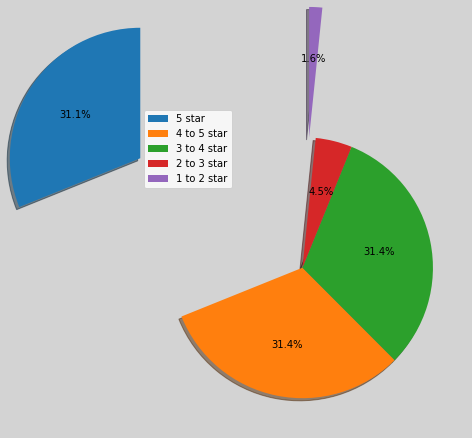

In [27]:
labels =  ['5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star']
nums = [star_on_5_average, star_on_4_to_5_average, star_on_3_to_4_average, star_on_2_to_3_average, star_on_1_to_2_average]

    fig, ax = plt.subplots()
    fig.set_facecolor('lightgrey')
    fig.set_size_inches(10, 6)
    explode = (1.5, 0, 0, 0, 1)
    patches, texts, auto = ax.pie(nums, shadow=True, startangle=90, explode=explode, autopct="%.1f%%")
    plt.legend(patches, labels, loc="best")


Text(0.5, 0.5, "My Dataset's Rating Distribution And Real On Tiki Website")

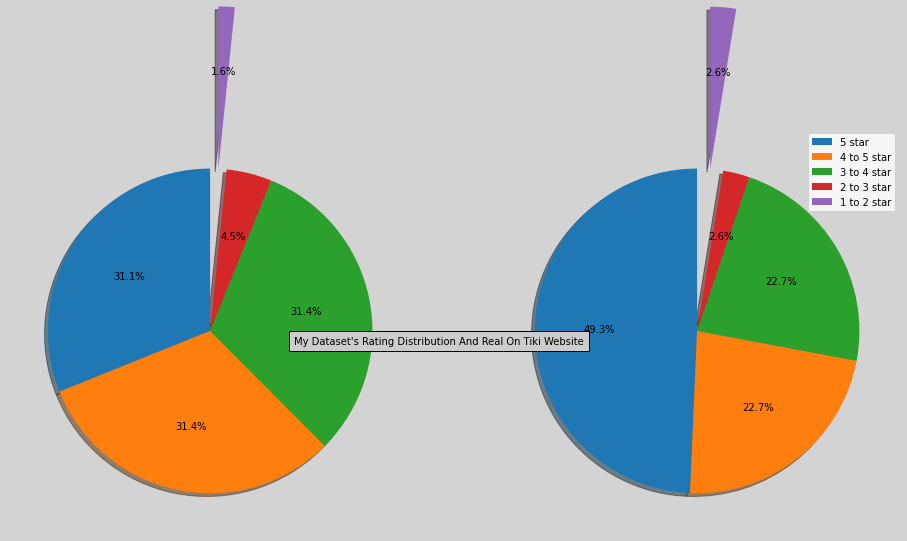

In [28]:
fig, (ax1,ax2) = plt.subplots(1, 2)
fig.set_size_inches(16, 30)
fig.set_facecolor('lightgrey')

labels =  ['5 star', '4 to 5 star', '3 to 4 star', '2 to 3 star', '1 to 2 star']
explode1 = (0, 0, 0, 0, 1)

nums = [star_on_5_average, star_on_4_to_5_average, star_on_3_to_4_average, star_on_2_to_3_average, star_on_1_to_2_average]
ax1.pie(nums, shadow=True, startangle=90, explode=explode1, autopct="%.1f%%")

explode2 = (0, 0, 0, 0, 1)
nums = [real_star_on_5_average, real_star_on_4_to_5_average, real_star_on_3_to_4_average, real_star_on_2_to_3_average, real_star_on_1_to_2_average]
ax2.pie(nums, shadow=True, startangle=90, explode=explode2, autopct="%.1f%%")

plt.legend(labels, loc="best")
plt.figtext(0.5, 0.5, 'My Dataset\'s Rating Distribution And Real On Tiki Website', ha='center', va='top', bbox={'facecolor':'0.8', 'pad':5})


In [29]:
reliable_items = pd.merge(overalls, detail_df[['id', 'n_sold']], how='inner', left_on='id', right_on='id')
reliable_items

,id,avg_rating,n_reviews,n_rate_5,n_rate_4,n_rate_3,n_rate_2,n_rate_1,rate_with_img,n_sold
0,112329645,4.5,20,14,3,2,1,0,0,860.0
1,2454355,4.7,365,309,38,4,4,10,60,2788.0
2,2454359,4.8,432,383,26,11,2,10,58,1591.0
3,2454353,4.8,367,324,25,6,2,10,60,2186.0
4,98565212,4.7,276,240,15,5,3,13,49,1511.0
...,...,...,...,...,...,...,...,...,...,...
24780,37687523,0.0,0,0,0,0,0,0,-1,NaN
24781,48759452,0.0,0,0,0,0,0,0,-1,NaN
24782,17912191,0.0,0,0,0,0,0,0,-1,NaN
24783,3110709,0.0,0,0,0,0,0,0,-1,NaN


In [30]:
reliable_items['n_sold'] = reliable_items['n_sold'].replace(np.nan, 0)

In [51]:
no_sold_up_10000 = len(reliable_items[reliable_items['n_sold'] >= 10000])
no_sold_from_5000_to_10000 = len(reliable_items[(reliable_items['n_sold'] >= 5000) & 
                                                (reliable_items['n_sold'] < 10000)])
no_sold_from_2000_to_5000 = len(reliable_items[(reliable_items['n_sold'] >= 2000) & 
                                                (reliable_items['n_sold'] < 5000)])
no_sold_from_1000_to_2000 = len(reliable_items[(reliable_items['n_sold'] >= 1000 ) & 
                                                (reliable_items['n_sold'] < 2000)])
no_sold_from_500_to_1000 = len(reliable_items[(reliable_items['n_sold'] >= 500 ) & 
                                                (reliable_items['n_sold'] < 1000)])
no_sold_from_200_to_500 = len(reliable_items[(reliable_items['n_sold'] >= 200 ) & 
                                                (reliable_items['n_sold'] < 500)])

no_sold_below_200 = len(reliable_items[reliable_items['n_sold'] < 200])


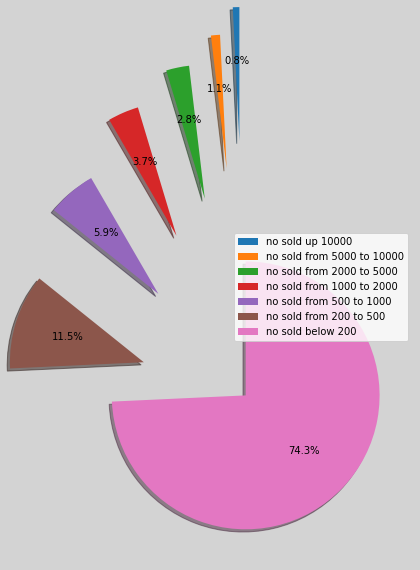

In [53]:
labels =  ['no sold up 10000', 'no sold from 5000 to 10000', 'no sold from 2000 to 5000', 'no sold from 1000 to 2000', 'no sold from 500 to 1000', 'no sold from 200 to 500', 'no sold below 200']
nums = [no_sold_up_10000, no_sold_from_5000_to_10000, no_sold_from_2000_to_5000, no_sold_from_1000_to_2000, no_sold_from_500_to_1000, no_sold_from_200_to_500, no_sold_below_200]

fig, ax = plt.subplots()
fig.set_facecolor('lightgrey')
fig.set_size_inches(6, 10)
explode = (1.9, 1.7, 1.5, 1.3, 1, 0.8, 0)
patches, texts, auto = ax.pie(nums, shadow=True, startangle=90, explode=explode, autopct="%.1f%%")
plt.legend(patches, labels, loc="best")


In [33]:
overalls.head()

,id,avg_rating,n_reviews,n_rate_5,n_rate_4,n_rate_3,n_rate_2,n_rate_1,rate_with_img
0,112329645,4.5,20,14,3,2,1,0,0
1,2454355,4.7,365,309,38,4,4,10,60
2,2454359,4.8,432,383,26,11,2,10,58
3,2454353,4.8,367,324,25,6,2,10,60
4,98565212,4.7,276,240,15,5,3,13,49


In [34]:
highest_reliable_items = reliable_items[(reliable_items['n_sold'] >= 1000) & (reliable_items['avg_rating'] == 5)]
print("Tiki suggestion should suggest to new users films that are not only highly rated but also bought by many users")
highest_reliable_items

Tiki suggestion should suggest to new users films that are not only highly rated but also bought by many users


,id,avg_rating,n_reviews,n_rate_5,n_rate_4,n_rate_3,n_rate_2,n_rate_1,rate_with_img,n_sold
3236,120450353,5.0,29,28,1,0,0,0,2,1203.0
13661,140416366,5.0,111,108,2,1,0,0,19,1062.0
14247,76198706,5.0,520,505,14,0,0,1,65,2188.0
14249,97957586,5.0,308,300,6,1,0,1,53,1146.0
14297,105708113,5.0,145,144,1,0,0,0,3,1505.0
21431,137119597,5.0,8,8,0,0,0,0,0,1292.0
22679,68267266,5.0,1295,1266,12,9,2,6,20,1029.0
23809,136260596,5.0,2,2,0,0,0,0,0,1024.0
23935,141792503,5.0,1,1,0,0,0,0,0,6680.0


In [35]:
categories = detail_df['category'].value_counts().index.tolist()
print(len(categories))
categories[:10]

1551


['Túi thời trang nam/Túi đeo chéo nam',
 'Túi thời trang nữ/Túi đeo chéo, túi đeo vai nữ/Túi đeo chéo dạo phố',
 'Balo và Vali/Balo/Balo nữ',
 'Điện Thoại - Máy Tính Bảng/Điện thoại Smartphone',
 'Máy Ảnh - Máy Quay Phim/Camera Giám Sát/Camera IP',
 'Túi thời trang nam/Ví nam/Ví nam ngang',
 'Đồng hồ và Trang sức/Trang sức/Vòng tay',
 'Giày - Dép nam/Dép nam/Dép nam quai ngang',
 'Giày - Dép nam/Giày thể thao nam/Giày thể thao nam cổ thấp',
 'Túi thời trang nữ/Ví nữ/Ví ngắn']

In [36]:
n = detail_df.shape[0]
detail_categories = {}
for i in range(n):
    cates = detail_df.iloc[i]['category']
    cates = cates.split("/")
    for cate in cates:
        if cate in detail_categories:
            detail_categories.update({cate: detail_categories[cate] + 1})
        else:
            detail_categories.update({cate: 1})

detail_categories


{'Bách Hóa Online': 1048,
 'Đồ Ăn Vặt': 51,
 'Các Loại Đồ Ăn Vặt Khác': 3,
 'Sữa và các Sản phẩm từ sữa': 188,
 'Sữa nước': 170,
 'Sữa Chua Uống & Ăn': 27,
 'Đồ Uống Không Cồn': 63,
 'Đồ uống có gas': 42,
 'Nước Ngọt': 30,
 'Thực phẩm Đóng hộp và Khô': 157,
 'Thực phẩm khô': 155,
 'Thực phẩm khô khác': 21,
 'Đồ uống - Pha chế dạng bột': 96,
 'Cà phê': 113,
 'Đặc sản Việt Nam': 13,
 'Thực phẩm': 51,
 'Đồ uống có cồn': 52,
 'Bia và Nước hoa quả lên men': 40,
 'Bia Nội Địa': 29,
 'Đồ uống không gas': 23,
 'Trà Uống Liền': 6,
 'Sữa Thực Vật': 39,
 'Thực phẩm ăn liền': 95,
 'Sữa tiệt trùng (UHT)': 79,
 'Chăm sóc thú cưng': 50,
 'Phụ kiện thú cưng': 15,
 'Dành cho chó': 7,
 'Chuồng chó': 1,
 'Đồ uống - Pha chế': 100,
 'Ngũ cốc, bột': 41,
 'Nước Tăng Lực': 11,
 'Gia Vị và Chế Biến': 111,
 'Dầu ăn': 17,
 'Các loại dầu khác': 6,
 'Bánh': 61,
 'Nước lọc đóng chai': 5,
 'Đậu & Hạt Các Loại': 80,
 'Hạt, củ, quả khô': 80,
 'Thực phẩm khác': 37,
 'Thực phẩm cao cấp': 1,
 'Dầu thực vật': 9,
 'Các Sản

In [37]:
detail_categories = dict(sorted(detail_categories.items(), key=lambda item: item[1], reverse=True))
detail_categories

{'Nhà Cửa - Đời Sống': 1345,
 'Thiết Bị Số - Phụ Kiện Số': 1259,
 'Làm Đẹp - Sức Khỏe': 1245,
 'Máy Ảnh - Máy Quay Phim': 1099,
 'Thời trang nam': 1064,
 'Thời trang nữ': 1057,
 'Balo và Vali': 1056,
 'Điện Gia Dụng': 1056,
 'Điện Tử - Điện Lạnh': 1056,
 'Giày - Dép nam': 1056,
 'Hàng Quốc Tế': 1056,
 'Laptop - Máy Vi Tính - Linh kiện': 1056,
 'Ô Tô - Xe Máy - Xe Đạp': 1056,
 'Phụ kiện thời trang': 1056,
 'Túi thời trang nam': 1056,
 'Túi thời trang nữ': 1056,
 'Voucher - Dịch vụ': 1056,
 'Đồ Chơi - Mẹ & Bé': 1055,
 'Đồng hồ và Trang sức': 1055,
 'Giày - Dép nữ': 1055,
 'Thể Thao - Dã Ngoại': 1055,
 'Nhà Sách Tiki': 1053,
 'Bách Hóa Online': 1048,
 'Sách tiếng Việt': 1005,
 'Phụ kiện - Chăm sóc xe': 986,
 'TIKINGON': 858,
 'Đồ dùng nhà bếp': 739,
 'Trang sức': 634,
 'Balo': 540,
 'Điện Thoại - Máy Tính Bảng': 527,
 'Túi đeo chéo nam': 527,
 'Phụ kiện thời trang nữ': 505,
 'Túi đeo chéo, túi đeo vai nữ': 488,
 'Âm thanh & Phụ kiện Tivi': 481,
 'Túi đeo chéo dạo phố': 457,
 'Phụ Kiện Máy

In [38]:
categories = list(detail_categories.keys())
count_item_per_category = list(detail_categories.values())

Text(0, 0.5, 'Number of tags assgined per category')

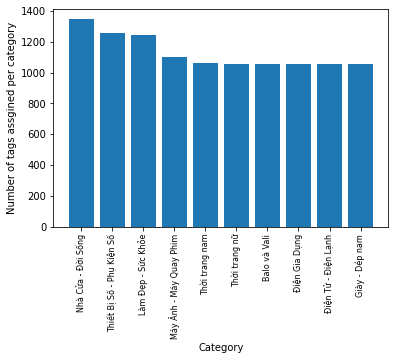

In [39]:
plt.bar(categories[:10], count_item_per_category[:10])
plt.xticks(categories[:10], rotation=90, size=8)
plt.xlabel('Category')
plt.ylabel('Number of tags assgined per category')

In [40]:
ratings

,user_id,item_id,rating,timestamp,comment
0,12134826,2454355,1,1638029440,"Tiki bán hàng “treo đầu dê bán thịt chó”, đưa ..."
1,10165696,2454355,5,1629035160,sản phẩm tuyệt với. shipper cũng tuyệt vời. ch...
2,11264068,2454355,2,1589629724,"sáng nay nhận sữa, 2 mẹ con uống 2 hộp, ói mữa..."
3,16720563,2454355,1,1595313777,"tiki làm việc tắc trách, tôi mua sữa yom..."
4,7778369,2454355,4,1627175789,Theo mình thấy dùng sưa hộp 1 lit mình thấy ng...
...,...,...,...,...,...
569767,5494932,10075988,2,1605365415,thái độ nhân viên vs lễ tân ko vui vẻ lắm
569768,7360413,10075988,1,1586694297,Thái độ nhân viên rất tệ. Lâu lâu còn đòi tiền...
569769,355076,10075988,5,1609226959,NaN
569770,370706,1705613,1,1566442616,"Mình có mua một mã kích hoạt ""khóa học Hacker..."


In [41]:
def timestamp_to_hour(timestamp):
    return datetime.fromtimestamp(timestamp).strftime("%H")

def timestamp_to_date(timestamp):
    return datetime.fromtimestamp(timestamp).strftime("%A")

In [42]:
ratings['Hour'] = ratings['timestamp'].apply(timestamp_to_hour)
ratings['Date'] = ratings['timestamp'].apply(timestamp_to_date)
ratings.head()

,user_id,item_id,rating,timestamp,comment,Hour,Date
0,12134826,2454355,1,1638029440,"Tiki bán hàng “treo đầu dê bán thịt chó”, đưa ...",23,Saturday
1,10165696,2454355,5,1629035160,sản phẩm tuyệt với. shipper cũng tuyệt vời. ch...,20,Sunday
2,11264068,2454355,2,1589629724,"sáng nay nhận sữa, 2 mẹ con uống 2 hộp, ói mữa...",18,Saturday
3,16720563,2454355,1,1595313777,"tiki làm việc tắc trách, tôi mua sữa yom...",13,Tuesday
4,7778369,2454355,4,1627175789,Theo mình thấy dùng sưa hộp 1 lit mình thấy ng...,08,Sunday


In [43]:
order_quantity_per_hour = ratings.groupby('Hour')['item_id'].agg(['count'])
print(type(order_quantity_per_hour))
order_quantity_per_hour.head()

<class 'pandas.core.frame.DataFrame'>


,count
Hour,
00,8773
01,4419
02,2526
03,1574
04,1626


In [44]:
#order_quantity_per_hour_title = order_quantity_per_hour.sort_values(by='count', ascending=False).index.tolist()
order_quantity_per_hour_title = order_quantity_per_hour.index.tolist()
order_quantity_per_hour_title[:10]

['00', '01', '02', '03', '04', '05', '06', '07', '08', '09']

In [45]:
#order_quantity_per_hour_value = order_quantity_per_hour.sort_values(by='count', ascending=False)['count'].tolist()
order_quantity_per_hour_value = order_quantity_per_hour['count'].tolist()
order_quantity_per_hour_value[:10]

[8773, 4419, 2526, 1574, 1626, 3362, 7337, 12708, 21364, 32778]

Text(0, 0.5, 'Number of orders bought per hour')

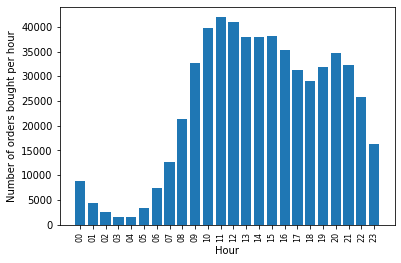

In [46]:
plt.bar(order_quantity_per_hour_title, order_quantity_per_hour_value)
plt.xticks(order_quantity_per_hour_title, rotation=90, size=8)
plt.xlabel('Hour')
plt.ylabel('Number of orders bought per hour')

In [47]:
order_quantity_per_day = ratings.groupby('Date')['item_id'].agg(['count'])
print(type(order_quantity_per_day))
order_quantity_per_day.head()

<class 'pandas.core.frame.DataFrame'>


,count
Date,
Friday,83074
Monday,83056
Saturday,78169
Sunday,75852
Thursday,82179


In [48]:
#order_quantity_per_day_title = order_quantity_per_day.sort_values(by='count', ascending=False).index.tolist()
order_quantity_per_day_title = order_quantity_per_day.index.tolist()
order_quantity_per_day_title[:10]

['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']

In [49]:
#order_quantity_per_day_value = order_quantity_per_day.sort_values(by='count', ascending=False)['count'].tolist()
order_quantity_per_day_value = order_quantity_per_day['count'].tolist()
order_quantity_per_day_value[:10]

[83074, 83056, 78169, 75852, 82179, 84737, 82697]

Text(0, 0.5, 'Number of orders bought per weekday and weekend')

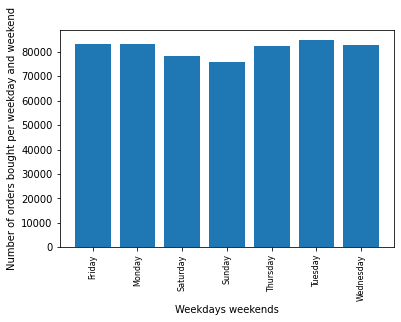

In [50]:
plt.bar(order_quantity_per_day_title, order_quantity_per_day_value)
plt.xticks(order_quantity_per_day_title, rotation=90, size=8)
plt.xlabel('Weekdays weekends')
plt.ylabel('Number of orders bought per weekday and weekend')